# Statistics for DS with Python

In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as pyplot
import matplotlib.ticker as ticker
import scipy.stats


## Task 1 - Get Familiar with the Data

The following describes the dataset variables:


·      CRIM - per capita crime rate by town
·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
·      INDUS - proportion of non-retail business acres per town.
·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
·      NOX - nitric oxides concentration (parts per 10 million)
·      RM - average number of rooms per dwelling
·      AGE - proportion of owner-occupied units built prior to 1940
·      DIS - weighted distances to five Boston employment centres
·      RAD - index of accessibility to radial highways
·      TAX - full-value property-tax rate per $10,000
·      PTRATIO - pupil-teacher ratio by town
·      LSTAT - % lower status of the population
·      MEDV - Median value of owner-occupied homes in $1000's

## Task 2 - Create an IBM account

As this was an optional step, I skipped this one as I had created such an account previously. 
Also, I will use my Github account for uploading this file.


## Task 3 - Load in the Dataset in your Jupyter Notebook

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [3]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


This is the table we are going to work on.

## Task 4 - Generate Descriptive Statistics and Visualizations

### Task 4.1 For the "Median value of owner-occupied homes" provide a boxplot

Column MEDV --> Median value of owner-occupied homes in $1000's
As it is not mentioend to make any kind of grouping, I only plotted this single value as a box plot

In [4]:
print (boston_df['MEDV'])

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64


Text(0.5, 1.0, "Median value of owner-occupied homes in $1000's")

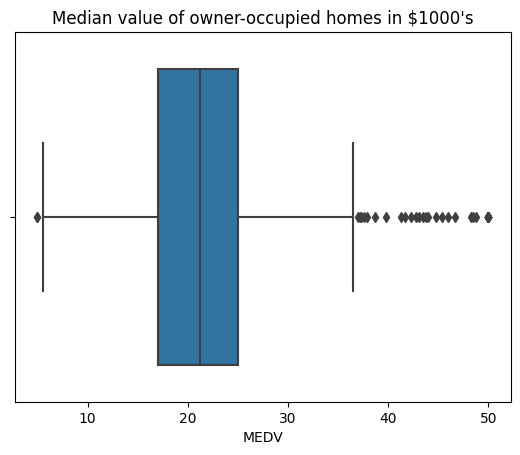

In [5]:
sns.boxplot(x=boston_df['MEDV']).set_title("Median value of owner-occupied homes in $1000's")

### Task 4.2 Provide a bar plot for the Charles river variable

Column CHAS --> Charles River dummy variable (1 if tract bounds river; 0 otherwise)

In [6]:
print (boston_df['CHAS'].median())
print (boston_df['CHAS'].unique())

0.0
[0. 1.]


As there are two unique values (0,1) in the CHAS column, I assume to split this data and plot the orrurence of each is to be done for Task 4.2

Text(0.5, 0, 'Charles River dummy variable (1 if tract bounds river; 0 otherwise)')

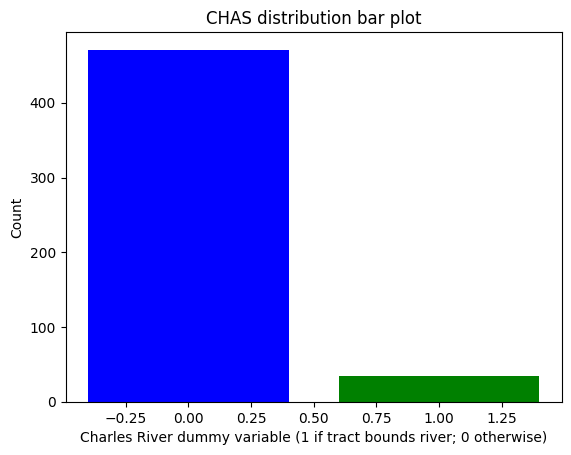

In [7]:
ax = pyplot.bar(boston_df.CHAS.unique(),boston_df.CHAS.value_counts(),color=['blue','green'])
pyplot.xlabel('CHAS')
pyplot.ylabel('Count')
pyplot.title('CHAS distribution bar plot')
pyplot.xlabel('Charles River dummy variable (1 if tract bounds river; 0 otherwise)')


### Task 4.3 Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

·      MEDV - Median value of owner-occupied homes in $1000's --> y-Axis
·      AGE - proportion of owner-occupied units built prior to 1940 --> x-Axis

In [8]:
# Making three groups according to the age
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

In [9]:
print (boston_df['age_group'])

0      between 35 and 70 years
1           70 years and older
2      between 35 and 70 years
3      between 35 and 70 years
4      between 35 and 70 years
                ...           
501    between 35 and 70 years
502         70 years and older
503         70 years and older
504         70 years and older
505         70 years and older
Name: age_group, Length: 506, dtype: object


Text(0, 0.5, "Median value of owner-occupied homes in $1000's")

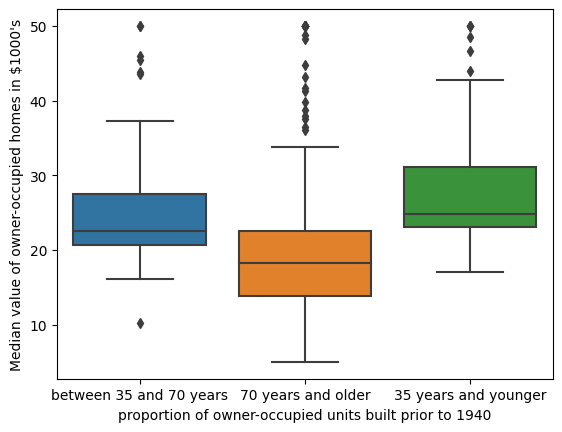

In [10]:
ax = sns.boxplot(x='age_group', y='MEDV', data=boston_df)
pyplot.xlabel("proportion of owner-occupied units built prior to 1940")
pyplot.ylabel("Median value of owner-occupied homes in $1000's")

### Task 4.4 Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

·      NOX - nitric oxides concentration (parts per 10 million) --> X
·      INDUS - proportion of non-retail business acres per town. --> Y

Text(0, 0.5, 'proportion of non-retail business acres per town')

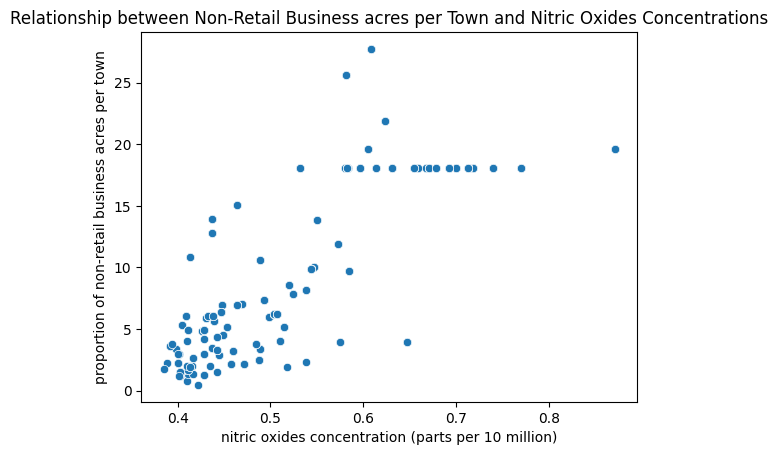

In [11]:
sns.scatterplot(x='NOX', y='INDUS', data=boston_df).set(title='Relationship between Non-Retail Business acres per Town and Nitric Oxides Concentrations')
pyplot.xlabel("nitric oxides concentration (parts per 10 million)")
pyplot.ylabel("proportion of non-retail business acres per town")


What can you say about the relationship?

There seems to be a (positive) correlation between Nictirc oxides concentration and the proportion of non-terail business acress. 

### Task 4.5 Create a histogram for the pupil to teacher ratio variable

·      PTRATIO - pupil-teacher ratio by town --> this seems to be the variable looked for = "pupil to teacher ratio variable"

Text(0.5, 1.0, 'Frequency Plot of Pupil-Teacher Ratio by Town ')

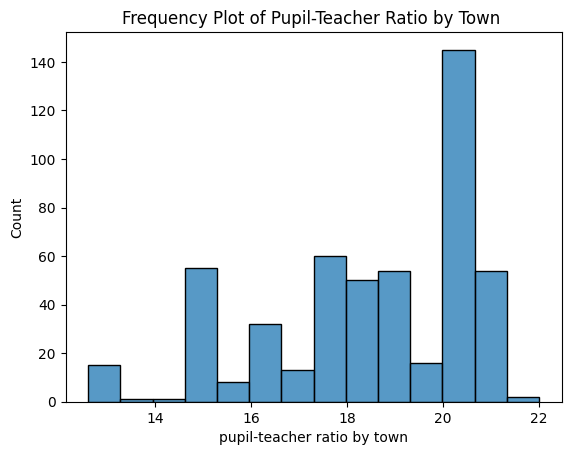

In [12]:
sns.histplot(data=boston_df, x="PTRATIO")
pyplot.xlabel('pupil-teacher ratio by town')
pyplot.title("Frequency Plot of Pupil-Teacher Ratio by Town ")

## Task 5: Use the appropriate tests to answer the questions provided.

Be sure to:

State your hypothesis.

Use α = 0.05

Perform the test Statistics.

State the conclusion from the test.

### Task 5.1: Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Assuming the question is to use the MEDV values and the CHAS values. This is not really clear to me as non native english speaker

State the hypothesis
* $H_0: µ_1 = µ_2$ ("there is no difference in median value of houses between bounded by the Charles river (yes and no)")
* $H_1: µ_1 ≠ µ_2$ ("there is a difference in median value of houses between bounded by the Charles river (yes and no)")

In [13]:
print (boston_df['CHAS'].unique())

[0. 1.]


In [14]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')

# since the p-value is less than 0.05 we can assume un-equality of variance

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [15]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = False)

Ttest_indResult(statistic=-3.113291312794837, pvalue=0.003567170098137517)

**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in MEDV (price) based on CHAS (bound to river)

### Task 5.2: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

State the hypothesis
* $H_0: µ_1 = µ_2 = µ_3$ (the three population means are equal)
* $H_1:$ At least one of the means differ

In [16]:
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'], 
                   center='mean')
# since the p-value is greater than 0.05, the variance are  equal.

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [17]:
low = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
med = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
high = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

In [18]:
f_statistic, p_value = scipy.stats.f_oneway(low, med, high)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:** Since the p-value is smaller than 0.05, we will reject the null hypothesis as there is a significant evidence that at least one of the means differ.


### Task 5.3: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)


State the hypothesis:
* $H_0:$ Nitric oxide concentration is not correlated with non-retail business acres per town
* $H_1:$ Nitric oxide concentration is correlated with non-retail business acres per town

Since they are both continuous variables we can use a pearson correlation test and draw a scatter plot
NOX - nitric oxides concentration (parts per 10 million)
INDUS - proportion of non-retail business acres per town.

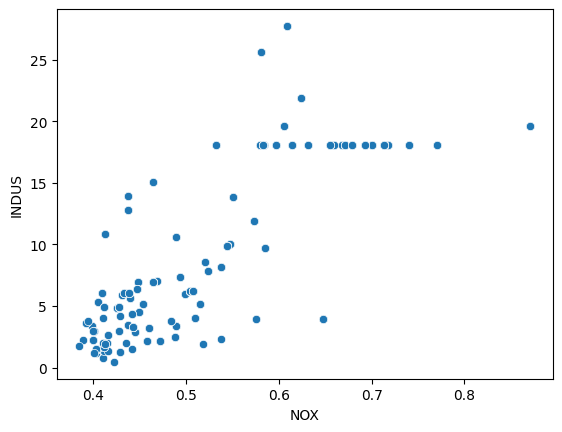

In [19]:
ax = sns.scatterplot(x="NOX", y="INDUS", data=boston_df)
# as done before

In [20]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209157, pvalue=7.91336106123623e-98)

**Conclusion:** Since the p-value is below 0.05, we reject the Null hypothesis and conclude that there exists a relationship between  Nitric oxide concentration and non-retail business acres per town.


### Task 5.4: What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

·      DIS - weighted distances to five Boston employment centres --> X
·      MEDV - Median value of owner-occupied homes in $1000's --> Y 

* $H_0: DIS has no effect on MEDV
* $H_1: DIS has an effect on MEDV

In [21]:
import statsmodels.api as sm

In [22]:

X = boston_df['DIS']
y = boston_df['MEDV']

## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 04 Jun 2023   Prob (F-statistic):           1.21e-08
Time:                        15:23:26   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

DIS coeff is a positive value; statistical difference as p-value < 0.05